In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
data = pd.read_csv('bank.csv',delimiter=';')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## **Data Preprocessing**

In [4]:
data = data.dropna()

In [5]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [6]:
X = data.drop('y', axis=1)
y = data['y']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Train the Model**

In [9]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [10]:
y_pred = model.predict(X_test)

## **Evaluate the Model**

In [11]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
confusion_matrix_output = confusion_matrix(y_test, y_pred)

In [12]:
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_report_output}')
print(f'Confusion Matrix:\n{confusion_matrix_output}')

Accuracy: 0.8939226519337017
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       807
           1       0.53      0.18      0.27        98

    accuracy                           0.89       905
   macro avg       0.72      0.58      0.61       905
weighted avg       0.87      0.89      0.87       905

Confusion Matrix:
[[791  16]
 [ 80  18]]


## **Visualize the Confusion Matrix**

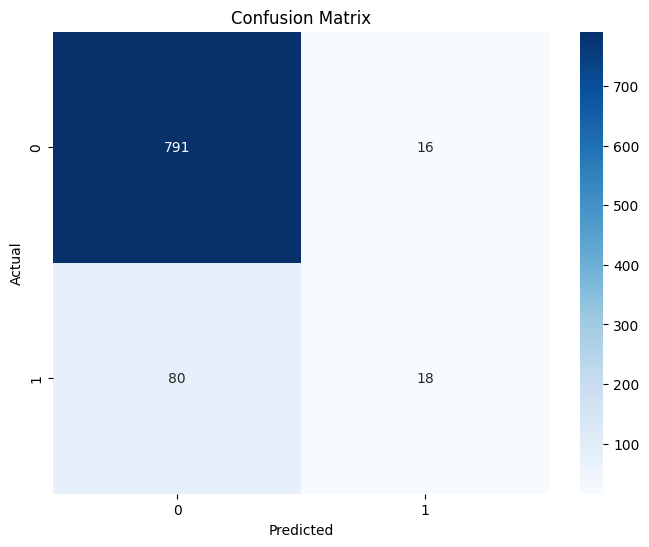

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_output, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()